In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate synthetic but realistic dataset
np.random.seed(42)
rows = 2500

dates = pd.date_range(start="2023-01-01", periods=rows, freq='D')
store_ids = np.random.randint(1, 20, size=rows)
item_ids = np.random.randint(100, 500, size=rows)
categories = np.random.choice(['Electronics', 'Grocery', 'Clothing', 'Furniture', 'Cosmetics'], rows)
price = np.round(np.random.uniform(50, 5000, rows), 2)
units_sold = np.random.randint(1, 100, rows)
advertising_spend = np.round(np.random.uniform(1000, 50000, rows), 2)
holiday = np.random.choice(['Yes', 'No'], rows, p=[0.2, 0.8])
sales = price * units_sold + np.random.normal(0, 50000, rows)

data = pd.DataFrame({
    'Date': dates,
    'Store_ID': store_ids,
    'Item_ID': item_ids,
    'Item_Category': categories,
    'Price': price,
    'Units_Sold': units_sold,
    'Advertising_Spend': advertising_spend,
    'Holiday': holiday,
    'Sales': sales
})

data.head()


,Date,Store_ID,Item_ID,Item_Category,Price,Units_Sold,Advertising_Spend,Holiday,Sales
0,2023-01-01,7,326,Clothing,3171.64,40,29154.15,Yes,41645.580916
1,2023-01-02,15,288,Grocery,2179.21,17,41291.46,No,89744.251274
2,2023-01-03,11,364,Cosmetics,2216.94,40,28570.81,Yes,70252.416703
3,2023-01-04,8,471,Electronics,1586.34,7,48255.07,No,1662.734170
4,2023-01-05,7,233,Furniture,3822.54,57,11643.98,No,217404.006082


In [2]:
data['Holiday'] = data['Holiday'].map({'Yes': 1, 'No': 0})
data = pd.get_dummies(data, columns=['Item_Category'], drop_first=True)
data = data.drop(columns=['Date', 'Item_ID'])
data.head()


,Store_ID,Price,Units_Sold,Advertising_Spend,Holiday,Sales,Item_Category_Cosmetics,Item_Category_Electronics,Item_Category_Furniture,Item_Category_Grocery
0,7,3171.64,40,29154.15,1,41645.580916,False,False,False,False
1,15,2179.21,17,41291.46,0,89744.251274,False,False,False,True
2,11,2216.94,40,28570.81,1,70252.416703,True,False,False,False
3,8,1586.34,7,48255.07,0,1662.734170,False,True,False,False
4,7,3822.54,57,11643.98,0,217404.006082,False,False,True,False


In [3]:
X = data.drop(columns=['Sales'])
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [5]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


✅ Model Performance:
MAE: 46750.35
MSE: 3584302364.85
RMSE: 59869.04
R² Score: 0.716


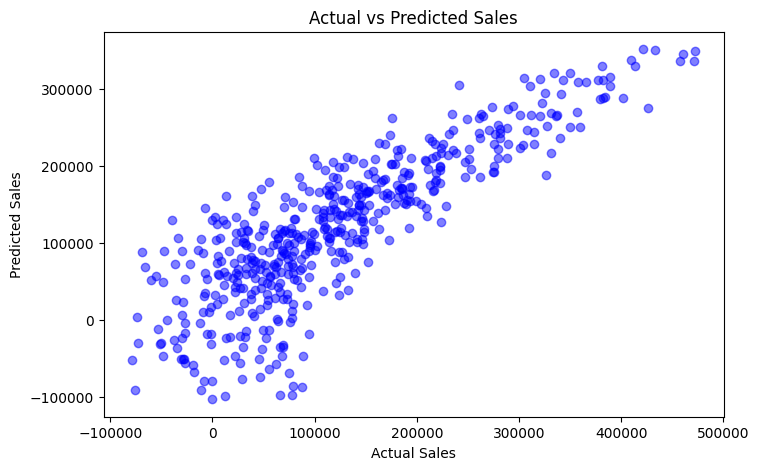

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [7]:
data.to_csv("sales_dataset.csv", index=False)
print("✅ Dataset saved as 'sales_dataset.csv'")


✅ Dataset saved as 'sales_dataset.csv'


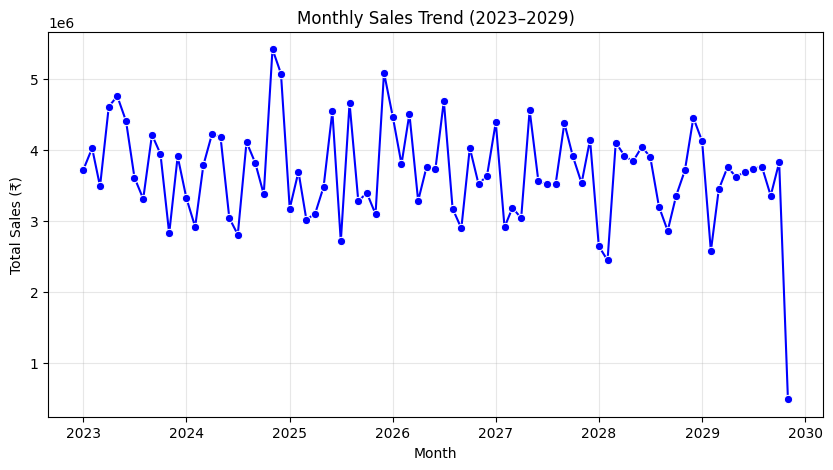

In [8]:
# Convert Date column back for trend analysis
data_dash = data.copy()
data_dash['Date'] = pd.date_range(start="2023-01-01", periods=len(data_dash), freq='D')

# Monthly sales trend
monthly_sales = data_dash.groupby(data_dash['Date'].dt.to_period("M"))['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o', color='blue')
plt.title("Monthly Sales Trend (2023–2029)")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.grid(True, alpha=0.3)
plt.show()


/tmp/ipython-input-1884868166.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_dash, x='Item_Category', y='Sales', estimator=sum, palette='coolwarm')
/tmp/ipython-input-1884868166.py:15: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


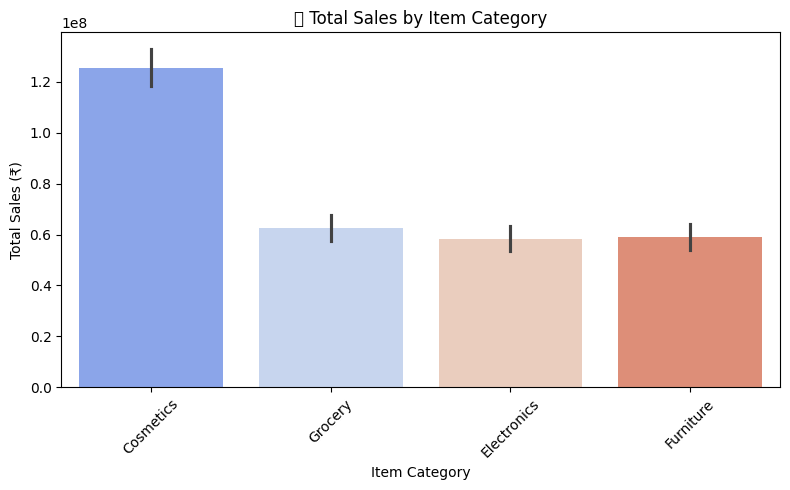

In [12]:
# Step 1: Identify category columns
category_columns = [col for col in data_dash.columns if 'Item_Category_' in col]

# Step 2: Convert one-hot columns back into single 'Item_Category'
data_dash['Item_Category'] = data_dash[category_columns].idxmax(axis=1)
data_dash['Item_Category'] = data_dash['Item_Category'].str.replace('Item_Category_', '')

# Step 3: Create a clean Sales by Category chart
plt.figure(figsize=(8,5))
sns.barplot(data=data_dash, x='Item_Category', y='Sales', estimator=sum, palette='coolwarm')
plt.title("💼 Total Sales by Item Category")
plt.xlabel("Item Category")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


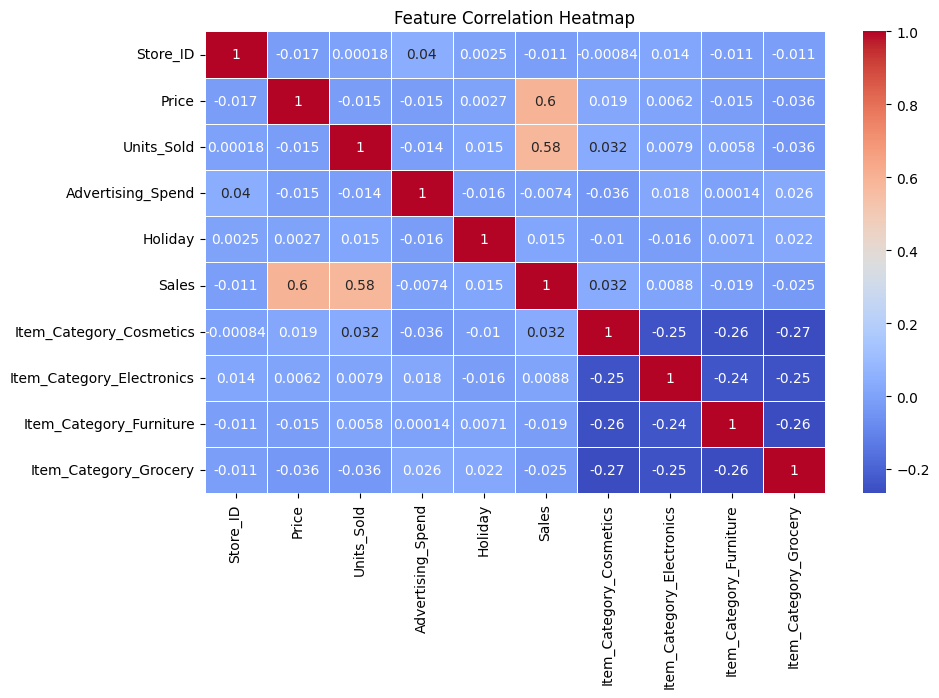

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


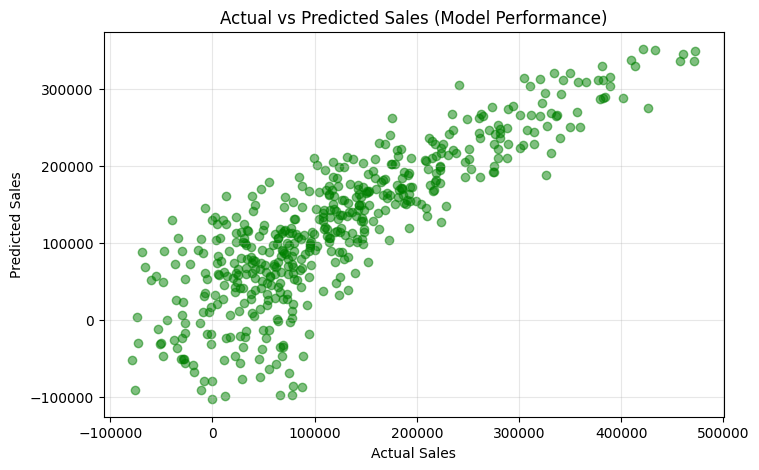

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Model Performance)")
plt.grid(True, alpha=0.3)
plt.show()


✅ All charts saved in your notebook files.


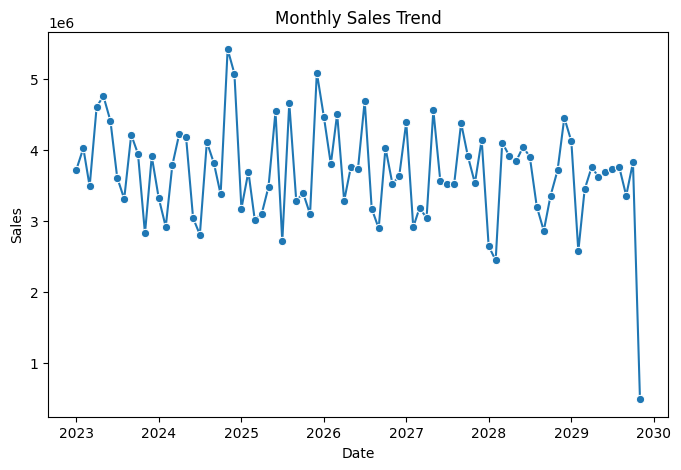

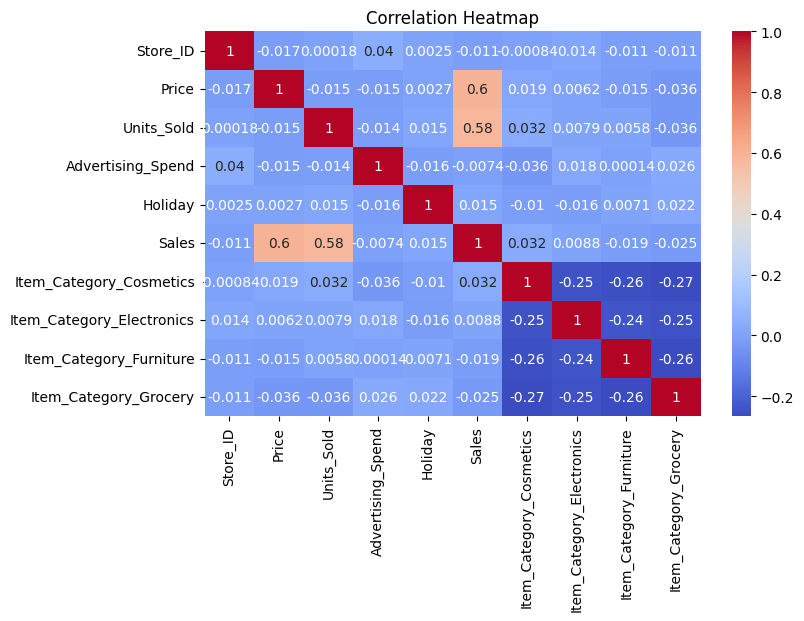

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.savefig("Monthly_Sales_Trend.png")

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("Correlation_Heatmap.png")

print("✅ All charts saved in your notebook files.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Charts saved successfully!


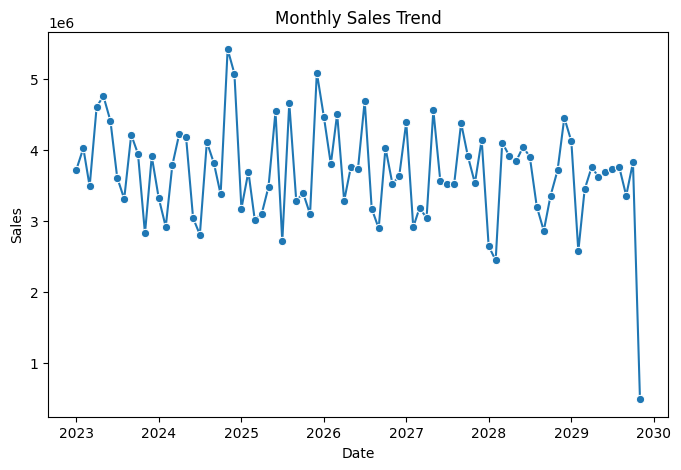

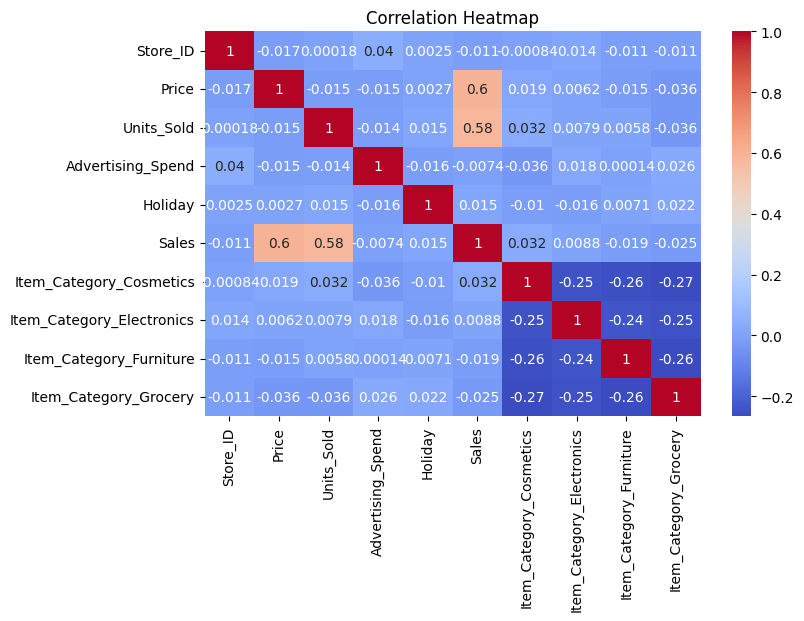

In [16]:
from google.colab import files

# Save dataset
data.to_csv("Sales_Prediction_Data.csv", index=False)
files.download("Sales_Prediction_Data.csv")

# Save charts
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.savefig("Monthly_Sales_Trend.png")

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("Correlation_Heatmap.png")

print("✅ Charts saved successfully!")
